# Traitement d'une image avec sklearn

On utilise un algorithme non supervisé pour changer les couleurs d'une imag. On va utiliser les k-means.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
image_paris = plt.imread("./data/paris.jpg")

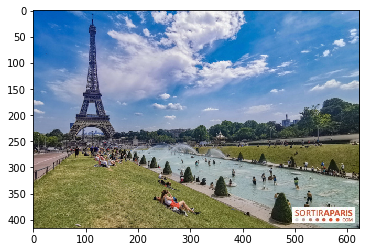

In [3]:
plt.imshow(image_paris)

In [4]:
image_paris.shape

(416, 624, 3)

In [5]:
# on passe à deux dimensions
data_paris = image_paris.reshape(-1,3)

In [6]:
data_paris.shape

(259584, 3)

In [8]:
from sklearn.cluster import KMeans
# on crée un objet KMeans avec 6 classes
modele_km = KMeans(n_clusters=6)
# on applique le modèle à nos données
modele_km.fit(data_paris)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
couleurs_centrales = modele_km.cluster_centers_

In [10]:
label_pixels = modele_km.labels_

In [11]:
# on construit une nouvelle image à partir des couleurs centrales
nouvelle_image = couleurs_centrales[label_pixels]

In [12]:
# on fait un reshape pour obtenir le format (416, 624, 3)

In [13]:
nouvelle_image = nouvelle_image.reshape(image_paris.shape
                                       ).astype("uint8")

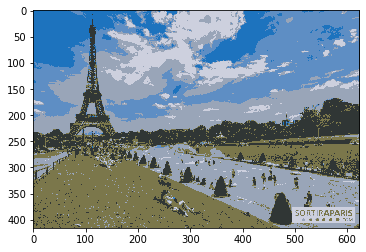

In [14]:
# on affiche l'image
plt.imshow(nouvelle_image)

## Création d'un fonction pour automatiqer le traitement

In [27]:
def reduction_couleur(fichier, nombre_couleurs):
    """ Cette fonction applique une transformation des couleurs d'une image en utilisant l'algorithme des k-means """
    
    image_init = plt.imread(fichier)
    data_image = image_init.reshape(-1,3)/255.0
    from sklearn.cluster import KMeans
    # on crée un objet KMeans
    modele_km = KMeans(n_clusters=nombre_couleurs)
    # on applique le modèle à nos données
    modele_km.fit(data_image)
    
    nouvelle_image = (modele_km.cluster_centers_[modele_km.labels_]*255).reshape(image_init.shape).astype("uint8")
    fig = plt.figure(figsize=(6,8))
    ax1 = fig.add_subplot(1,2,1)
    ax1.imshow(image_init)
    ax2 = fig.add_subplot(1,2,2)
    ax2.imshow(nouvelle_image)
    return nouvelle_image

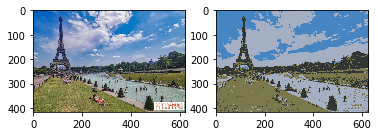

In [28]:
new_paris = reduction_couleur("./data/paris.jpg",4)